<!--
模板使用方法：将此代码块转为Markdown块然后点击左侧三角渲染（依赖 jupyter-wysiwyg ）
模板参数说明：将超链接的路径替换即可
@hyperlink_1: href="https://github.com/{组织或用户}/{仓库}/blob/{分支}/{目录和文件名组成的路径}"
@hyperlink_2: href="https://nbviewer.org/github/{组织或用户}/{仓库}/blob/{分支}/{目录和文件名组成的路径}"
注意事项：在 <p>...</p> 中添加注释或者空行等行为会破坏渲染效果
-->

<!-- start of template header -->
<p>
<div style="display:flex">
<a alt="hyperlink_1" title="在Github查看当前文件" href="https://github.com/Soltus/learn-python-BI/blob/main/lesson2/%E4%BD%9C%E4%B8%9A/3/index.ipynb" target="_blank"><img src="https://img.shields.io/badge/File-black?logo=github" style="height: 38px"/></a>
<span style="width:5.8px"></span>
<a alt="hyperlink_2" title="在nbviewer查看当前文件" href="https://nbviewer.org/github/Soltus/learn-python-BI/blob/main/lesson2/%E4%BD%9C%E4%B8%9A/3/index.ipynb" target="_blank"><img src="https://img.shields.io/badge/nbviewer-white?logo=jupyter" style="height: 38px"/></a>
</div>
</p>

<!-- 避免二次渲染当前块 -->
<!-- 请勿在此处添加内容 -->
<!-- end of template header -->

<h1><span style="color: #b96ad9;">题一 </span></h1>
<blockquote>
<p>中文新闻分类学习，参考：<code>中文新闻分类.txt</code></p>
</blockquote>

In [513]:
CNEWS_DATA_TXT = '../data/3/中文新闻分类.txt'
CNEWS_SPLITED_TXT = 'cnews.jieba.txt'
STOPWORDS_TXT = '../data/3/stopwords.txt'
USERDIC_TXT = 'userdic.txt'

## 定义分词类

In [514]:
import jieba
import warnings

class ChineseSegmentation:
    ''' base on Leijieba '''
    stopwords = []

    def __init__(self, sentence, stopword_file_path='', user_dict_file_path='', debug=False):
        ''''''
        self.sentence = sentence
        self.debug = debug

        if stopword_file_path != '':
            self.stopwords = [line.strip() for line in open(stopword_file_path, encoding='UTF-8').readlines()]
        else:
            warnings.warn('丫的 stopword_file_path 为空')

        if user_dict_file_path != '':
            jieba.load_userdict(user_dict_file_path)
        else:
            warnings.warn('丫的 user_dict_file_path 为空')

    def _fn_cut_words(self):
        ''''''
        seg_list = jieba.cut(self.sentence, cut_all=False)
        if self.stopwords:
            output_words = [word for word in list(seg_list) if word not in self.stopwords and word.strip() != '']
            seg_list = output_words
        return list(seg_list)

    def word_frequency(self):
        ''''''
        word_list = self._fn_cut_words()
        word_dict = {}
        for word in word_list:
            if word not in word_dict:
                word_dict[word] = 1
            else:
                word_dict[word] += 1
        return sorted(word_dict.items(), key=lambda e:e[1], reverse=True)

    def cut_words_filter(self, frequency_threshold=0, remove_single_word=False):
        '''
        因为只有出现频率大于frequency_threshold的单词才会被保留下来
        如果remove_single_word被设置为True，则单个字符的单词将始终被过滤掉
        '''
        word_list = self._fn_cut_words()
        word_dict = {}
        removed_list = []
        for word in word_list:
            if word not in word_dict:
                word_dict[word] = 1
            else:
                word_dict[word] += 1
        word_dict_sorted = dict(sorted(word_dict.items(), key=lambda e:e[1], reverse=True)) 
        filtered_word_list = word_list[:]

        if remove_single_word:
            for word in word_list:
                if len(word) == 1:
                    filtered_word_list.remove(word)
                    removed_list.append(word)
                else:
                    if word_dict_sorted[word] <= frequency_threshold:
                        filtered_word_list.remove(word)
                        removed_list.append(word)
        else:
            for word in word_list:
                if word_dict_sorted[word] <= frequency_threshold:
                    filtered_word_list.remove(word)
                    removed_list.append(word)

        if self.debug:
            removed_list_len = len(removed_list)
            if 0 < removed_list_len < 50:
                warnings.warn(f'\t removed_list from filtered_word_list : ( {removed_list_len} ) \n {removed_list} ')
            elif 50 < removed_list_len:
                warnings.warn(f'\t removed_list from filtered_word_list : ( {removed_list_len} ) \n {removed_list[:20]} \n ... \n {removed_list[-20:]} ')

            print('-'*10)

            filtered_word_list_len = len(filtered_word_list)
            if 0 < filtered_word_list_len < 100:
                print(f'\t filtered_word_list : ( {filtered_word_list_len} ) \n {filtered_word_list} ')
            elif 100 < filtered_word_list_len:
                print(f'\t filtered_word_list : ( {filtered_word_list_len} ) \n {filtered_word_list[:40]} \n ... \n {filtered_word_list[-40:]} ')

            print('-'*10)

            print(f'\t TOP10 words : \n {self.word_frequency()[:10]} ')

        return filtered_word_list


## 数据处理

In [515]:
import pandas as pd
txtfile = pd.read_csv(CNEWS_DATA_TXT, sep='\t', encoding = 'utf-8', header = None)
txtfile[1]

0       新辉腾　４．２　Ｖ８　４座加长Ｉｎｄｉｖｉｄｕａｌ版２０１１款　最新报价
1                              ９１８　Ｓｐｙｄｅｒ概念车
2                   日内瓦亮相　ＭＩＮＩ性能版／概念车－１．６Ｔ引擎
3                     清仓大甩卖一汽夏利Ｎ５威志Ｖ２低至３．３９万
4                         大众敞篷家族新成员　高尔夫敞篷版实拍
                        ...                 
4995                            常吃六类食物快速补充水分
4996                     情感：你是我的那盘菜　吃不起我走【２】
4997                       揭秘不老女神刘晓庆的四任丈夫（图）
4998                           样板潮爸　时尚圈里的父亲们
4999                全球最美女人长啥样？中国最美女人酷似章子怡（图）
Name: 1, Length: 5000, dtype: object

In [516]:
import re
for i in range(len(txtfile)):
    txtfile[1][i] = re.sub(r'[^\u4e00-\u9fa5]+',' ',txtfile[1][i])
txtfile[1].replace(' ', np.nan, inplace=True)
print(txtfile[1].isnull().sum())
txtfile.dropna(subset=txtfile.columns.tolist()[1], inplace=True)
txtfile.reset_index(drop=True, inplace=True)
print(txtfile[1].isnull().sum())
# 此处直接替换了 txtfile ，重新运行需要先运行前置单元格
txtfile[1]

47
0


0               新辉腾 座加长 版 款 最新报价
1                            概念车
2               日内瓦亮相 性能版 概念车 引擎
3              清仓大甩卖一汽夏利 威志 低至 万
4             大众敞篷家族新成员 高尔夫敞篷版实拍
                  ...           
4948                常吃六类食物快速补充水分
4949           情感 你是我的那盘菜 吃不起我走 
4950           揭秘不老女神刘晓庆的四任丈夫 图 
4951               样板潮爸 时尚圈里的父亲们
4952    全球最美女人长啥样 中国最美女人酷似章子怡 图 
Name: 1, Length: 4953, dtype: object

In [517]:
userdic = 'QQ694357845QQ'
with open(USERDIC_TXT,'w', encoding='utf-8') as f:
    f.write(userdic)
s = userdic.join(list(txtfile[1]))
m = ChineseSegmentation(s, STOPWORDS_TXT, USERDIC_TXT, 1)


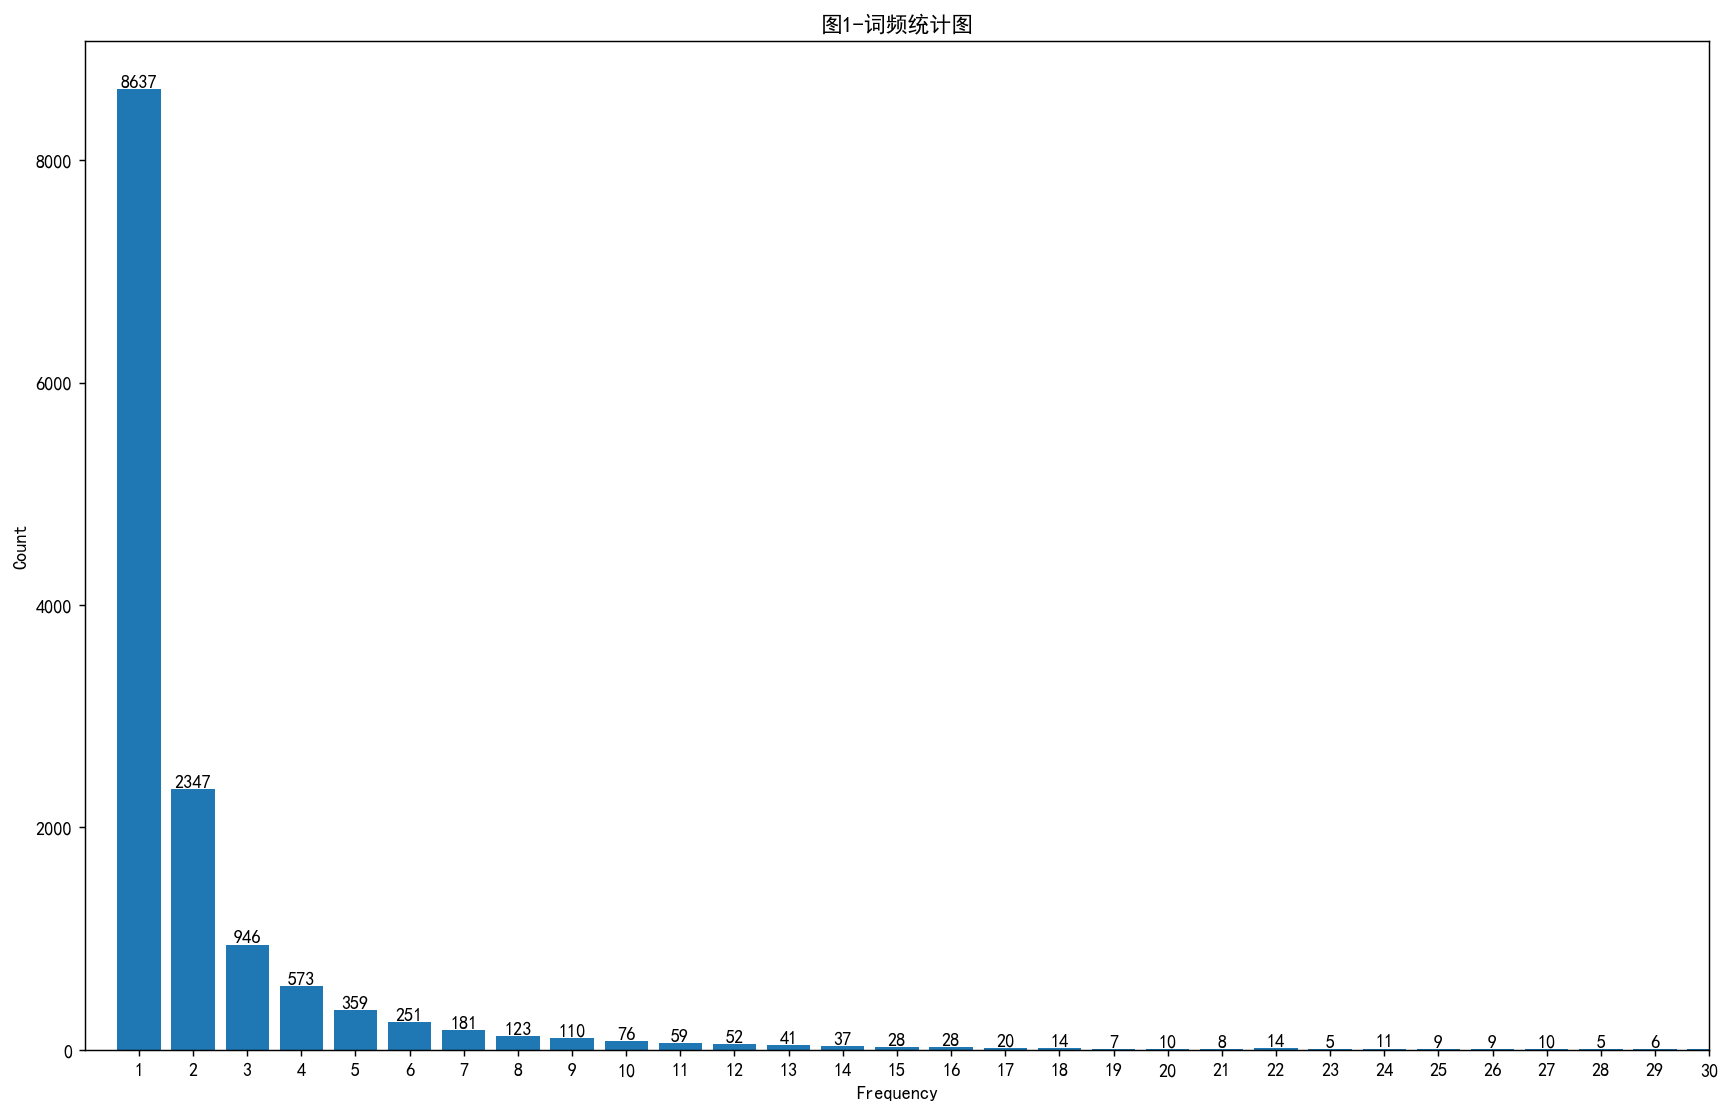

In [518]:
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
plt.rcParams['font.sans-serif'] = ['SimHei']   # 防止中文标签乱码
CANVAS = lambda x : plt.figure(figsize=(16, 10), dpi=x)  # 设置画布

word_count = dict(m.word_frequency())
del word_count[userdic]

count = {}
for value in word_count.values():
    if value not in count:
        count[value] = 1
    else:
        count[value] += 1

# 绘制频数统计图
CANVAS(131)
plt.bar(count.keys(), count.values())
plt.title('图1-词频统计图')
plt.xlabel('Frequency')
plt.ylabel('Count')
# 显示每条柱形图的具体数值
for x, y in zip(count.keys(), count.values()):
    if 0 <= x < 30:   # 只在x轴范围为0到29的情况下显示数值
        plt.text(x, y, str(y), ha='center', va='bottom')
plt.xticks(list(count.keys()))  # 设置x轴刻度
plt.xlim(0, 30)   # 设置x轴显示范围
plt.show()
# print(sorted(count.items(),key=lambda e:e[1],reverse=1))

In [519]:
filtered_word_list = m.cut_words_filter(1, 1) # 根据图1，frequency_threshold 定为 1 比较合理，详见附录一

s1 = ' '.join(filtered_word_list)

with open(CNEWS_SPLITED_TXT,'w', encoding='utf-8') as f:
    f.write(s1.replace(f'{userdic}','\n'))
print('-'*10)
with open(CNEWS_SPLITED_TXT,'r', encoding='utf-8') as f:
    print(f'\t write {len(f.readlines())} lines to {CNEWS_SPLITED_TXT}')
print()

C:\Windows\Temp\ipykernel_36328\598874929.py:78: UserWarning: 	 removed_list from filtered_word_list : ( 13237 ) 
 ['新辉腾', '座', '加长', '版', '款', '版', '甩卖', '低至', '万', '新', '款', '戈蓝', '升级版', '款', '卡宴', '新', '店实', '拍', '九江', '享'] 
 ... 
 ['点心', '条', '不花', '冤枉钱', '甩', '铅笔', '裙', '六类', '那盘', '菜', '吃不起', '走', '不老', '四任', '图', '样板', '圈里', '长', '样', '图'] 
  warnings.warn(f'\t removed_list from filtered_word_list : ( {removed_list_len} ) \n {removed_list[:20]} \n ... \n {removed_list[-20:]} ')


----------
	 filtered_word_list : ( 27307 ) 
 ['最新', '报价', 'QQ694357845QQ', '概念车', 'QQ694357845QQ', '日内瓦', '亮相', '性能', '概念车', '引擎', 'QQ694357845QQ', '清仓', '一汽', '夏利', '威志', 'QQ694357845QQ', '大众', '敞篷', '家族', '成员', '高尔夫', '敞篷版', '实拍', 'QQ694357845QQ', '悦翔', '两厢', '舒适型', '最新', '报价', 'QQ694357845QQ', '旗舰', '最新', '报价', 'QQ694357845QQ', '华泰', '宝利格', 'QQ694357845QQ', '酷似', '华泰', '宝利格'] 
 ... 
 ['养生', '食物', '滋补', '女人', '身体', '组图', 'QQ694357845QQ', '组图', '诱惑', '来袭', '盘点', '明星', '时尚', '裙装', 'QQ694357845QQ', '常吃', '食物', '快速', '补充', '水分', 'QQ694357845QQ', '情感', 'QQ694357845QQ', '揭秘', '女神', '刘晓庆', '丈夫', 'QQ694357845QQ', '潮爸', '时尚', '父亲', 'QQ694357845QQ', '全球', '最美', '女人', '中国', '最美', '女人', '酷似', '章子怡'] 
----------
	 TOP10 words : 
 [('QQ694357845QQ', 4952), ('图', 202), ('中国', 192), ('报价', 151), ('组图', 143), ('款', 137), ('最新', 121), ('新', 111), ('称', 106), ('万', 94)] 
----------
	 write 4953 lines to cnews.jieba.txt



In [520]:
txt = pd.read_csv(CNEWS_SPLITED_TXT, sep='\t', encoding = 'utf-8', header = None, skip_blank_lines=False) # skip_blank_lines=False 禁用跳过空行，否则将导致下面train_test_split 的 X 和 y 行数不一致
txt

,0
0,最新 报价
1,概念车
2,日内瓦 亮相 性能 概念车 引擎
3,清仓 一汽 夏利 威志
4,大众 敞篷 家族 成员 高尔夫 敞篷版 实拍
...,...
4948,常吃 食物 快速 补充 水分
4949,情感
4950,揭秘 女神 刘晓庆 丈夫
4951,潮爸 时尚 父亲


## 训练模型

In [521]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word', max_features=4000,  lowercase = False)
vectorizer.fit(list(txt[0]))
X = vectorizer.transform(list(txt[0]))
X.shape

(4953, 4000)

In [522]:
import numpy as np

# 生成类别列表
categories = txtfile[0].unique()
ordering = list(categories)
print(ordering)

# 将类别列表中的类别名转化为对应的序号
y = np.array(txtfile[0].map(lambda x: ordering.index(x)))
y.shape

['汽车', '财经', '科技', '健康', '体育', '教育', '文化', '军事', '娱乐', '时尚']


(4953,)

In [523]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [524]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [525]:
y_pred = classifier.predict(X_test)

## 结果分析

In [526]:
from sklearn.metrics import classification_report
t = classification_report(y_test, y_pred, target_names = ordering)
print(t)

              precision    recall  f1-score   support

          汽车       0.97      0.91      0.94       120
          财经       0.60      0.71      0.65       119
          科技       0.71      0.69      0.70       130
          健康       0.76      0.56      0.64       144
          体育       0.69      0.92      0.79       111
          教育       0.74      0.71      0.72       130
          文化       0.56      0.60      0.58       114
          军事       0.79      0.69      0.74       121
          娱乐       0.65      0.59      0.62       131
          时尚       0.67      0.76      0.71       119

    accuracy                           0.71      1239
   macro avg       0.71      0.71      0.71      1239
weighted avg       0.72      0.71      0.71      1239



<p><span style="font-size: 14pt;">macro avg 即使用宏平均值（average='macro'）来计算模型的性能指标</span></p>
<p><span style="font-size: 14pt;">weighted avg 即使用加权平均值（average='weighted'）来计算模型的性能指标</span></p>
<p><span style="font-size: 14pt;"><span style="font-size: 18.6667px;">accuracy、precision、recall 、f1-score&nbsp;分别表示计算模型在测试集上的准确率、精确率、召回率和 F1 值</span></span></p>

<p><span style="font-size: 14pt; color: #e67e23;">结果显示，该模型在汽车领域的预测效果最好，在文化领域则较差</span></p>
<p>&nbsp;</p>

<h1 id="附录一"><span style="color: #b96ad9;">附录一</span></h1>
<blockquote>
<p><span style="font-size: 14pt;">不同 frequency_threshold 参数值的结果</span></p>
</blockquote>
<p style="text-align: center;"><span style="font-size: 14pt;">frequency_threshold=0</span></p>
<p style="text-align: center;">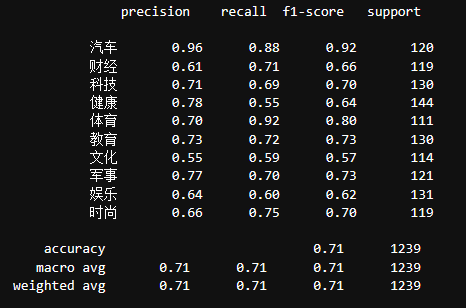</p>
<p style="text-align: center;"><span style="font-size: 18.6667px;">frequency_threshold=1</span></p>
<p>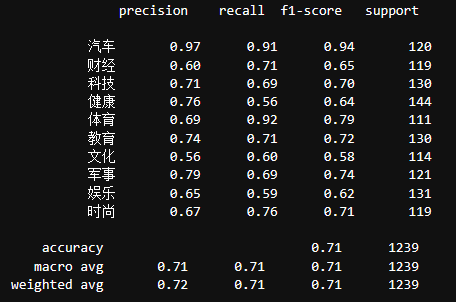</p>
<p style="text-align: center;"><span style="font-size: 18.6667px; text-align: center;">frequency_threshold=2</span></p>
<p style="text-align: center;">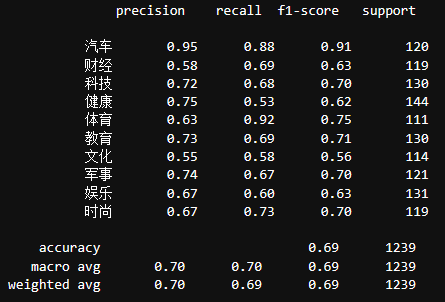</p>
<p style="text-align: center;"><span style="font-size: 18.6667px; text-align: center;">frequency_threshold=3</span></p>
<p style="text-align: center;">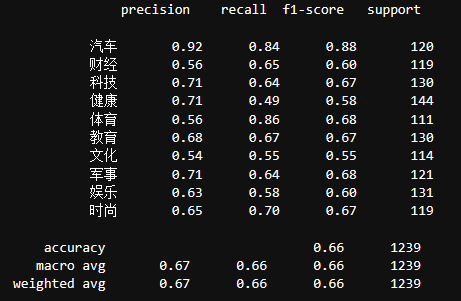</p>
<p style="text-align: center;"><span style="font-size: 18.6667px; text-align: center;">frequency_threshold=10</span></p>
<p>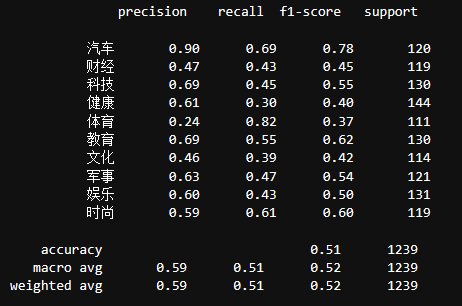</p>